<a href="https://colab.research.google.com/github/andrevramos/hw2-AVR-4580/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 6

#### Students: Andre Ramos (avr35)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 20, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on Canvas. Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

ChatGPT was used to help with coding and markup writing

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.

*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

In [ ]:
import numpy as np

def time_to_collect_all(n, rng):
    """Simulate the number of plays until all n songs have been heard at least once."""
    seen = np.zeros(n, dtype=bool)
    count = 0
    unique_seen = 0

    while unique_seen < n:
        song = rng.integers(0, n)   # song index in {0, 1, ..., n-1}
        count += 1
        if not seen[song]:
            seen[song] = True
            unique_seen += 1
    return count

def simulate_coupon_collector(n, num_rep=10000, seed=0):
    """Run num_rep simulations and return mean and 95% CI."""
    rng = np.random.default_rng(seed)
    samples = np.empty(num_rep, dtype=float)

    for i in range(num_rep):
        samples[i] = time_to_collect_all(n, rng)

    mean = samples.mean()
    s = samples.std(ddof=1)
    z = 1.96  # for 95% CI
    half_width = z * s / np.sqrt(num_rep)

    ci_lower = mean - half_width
    ci_upper = mean + half_width
    return mean, ci_lower, ci_upper

In [ ]:
n_list = [5, 10, 20, 50, 100, 200, 500, 1000]
num_rep = 10000

print("n\tmean\t\tCI_lower\tCI_upper")
for n in n_list:
    mean, lo, hi = simulate_coupon_collector(n, num_rep=num_rep, seed=42)
    print(f"{n}\t{mean:.2f}\t\t{lo:.2f}\t\t{hi:.2f}")

n	mean		CI_lower	CI_upper
5	11.50		11.40		11.60
10	29.38		29.16		29.60
20	72.35		71.89		72.82
50	225.75		224.54		226.96
100	518.09		515.66		520.52
200	1170.92		1165.95		1175.89
500	3397.23		3384.67		3409.78
1000	7490.84		7465.67		7516.01


<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $0$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

In [ ]:
from collections import Counter

def last_song_to_appear(n=20, start=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()

    current = start
    seen = {current}
    last_new = None

    while len(seen) < n:
        # step = +1 or -1 with equal probability
        step = 1 if rng.random() < 0.5 else -1
        current = (current + step) % n

        if current not in seen:
            seen.add(current)
            last_new = current

    return last_new

def simulate_last_song_hist(n=20, start=1, num_rep=20000, seed=0):
    rng = np.random.default_rng(seed)
    counts = Counter()

    for _ in range(num_rep):
        last = last_song_to_appear(n=n, start=start, rng=rng)
        counts[last] += 1

    return counts

# Run simulation
num_rep = 20000
counts = simulate_last_song_hist(n=20, start=1, num_rep=num_rep, seed=123)

# Convert to probabilities
hist_probs = {song: c/num_rep for song, c in sorted(counts.items())}

print("Song\tCount\tProb")
for song in sorted(counts.keys()):
    print(f"{song}\t{counts[song]}\t{counts[song]/num_rep:.4f}")

Song	Count	Prob
0	1070	0.0535
2	1024	0.0512
3	1046	0.0523
4	1067	0.0534
5	1097	0.0549
6	1082	0.0541
7	1054	0.0527
8	1025	0.0512
9	1023	0.0512
10	1039	0.0520
11	1096	0.0548
12	1012	0.0506
13	1069	0.0534
14	1061	0.0530
15	1063	0.0532
16	1047	0.0524
17	1033	0.0517
18	1018	0.0509
19	1074	0.0537


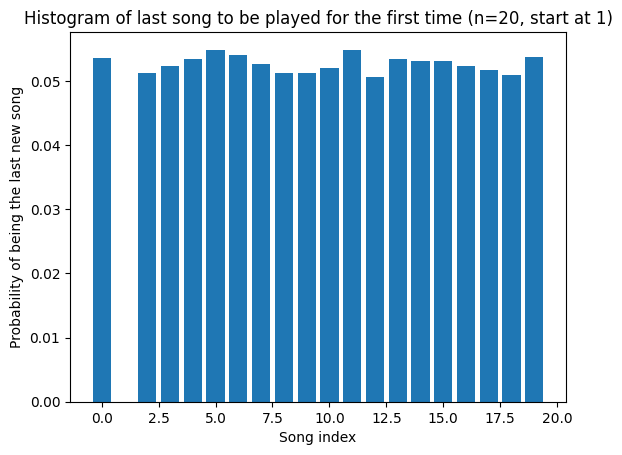

In [ ]:
import matplotlib.pyplot as plt

songs = sorted(counts.keys())
freqs = [counts[s] / num_rep for s in songs]

plt.bar(songs, freqs)
plt.xlabel("Song index")
plt.ylabel("Probability of being the last new song")
plt.title("Histogram of last song to be played for the first time (n=20, start at 1)")
plt.show()

<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money.

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

In [ ]:
import numpy as np

def gambler_ruin_trial(a, total=20, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    fortune = a          # A's current money
    while 0 < fortune < total:
        # A wins with prob 1/2, loses with prob 1/2
        if rng.random() < 0.5:
            fortune += 1
        else:
            fortune -= 1
    # If A ends up with total, A won; otherwise A lost
    return 1 if fortune == total else 0

def estimate_pA(a, total=20, num_rep=20000, seed=0):
    rng = np.random.default_rng(seed)
    wins = 0
    for _ in range(num_rep):
        wins += gambler_ruin_trial(a, total, rng)
    return wins / num_rep

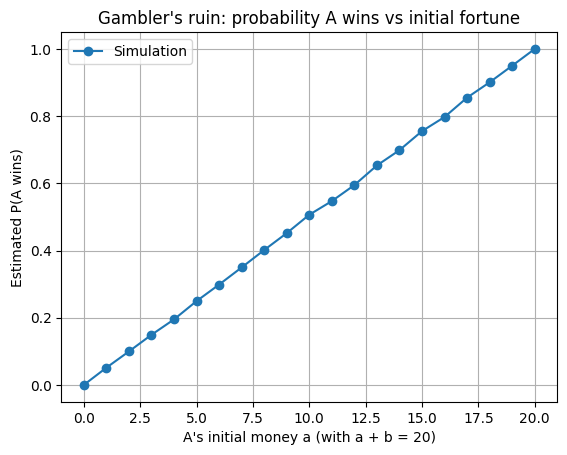

In [ ]:
import matplotlib.pyplot as plt

total = 20
num_rep = 20000

a_values = list(range(total + 1))
p_estimates = [estimate_pA(a, total=total, num_rep=num_rep, seed=a)  # different seed per a
               for a in a_values]

plt.plot(a_values, p_estimates, 'o-', label='Simulation')
plt.xlabel("A's initial money a (with a + b = 20)")
plt.ylabel("Estimated P(A wins)")
plt.title("Gambler's ruin: probability A wins vs initial fortune")
plt.grid(True)
plt.legend()
plt.show()

$$
\textbf{Conjectured formula from the simulation:} \\[6pt]
\text{When } a = 0,\quad P(A \text{ wins}) \approx 0. \\[4pt]
\text{When } a = 20,\quad P(A \text{ wins}) \approx 1. \\[8pt]
\text{For } a = 1,2,\dots,19,\ \text{the simulated probabilities lie almost on a line from } --(0,0) \text{ to } (20,1), \\[4pt]
\text{so we conjecture } P(A \text{ wins} \mid a+b=20) \approx \frac{a}{20}. \\[8pt]
\text{More generally, for total budget } a+b,\ \boxed{P(A \text{ wins}) = \frac{a}{a+b}}. \\[8pt]
\text{In particular, if } a=b,\quad P(A \text{ wins}) = \frac{a}{2a} = \frac{1}{2}.
$$

**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.

Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

In [ ]:
def gambler_ruin_time(a, b, rng=None):
    """
    Simulate one gambler's ruin path.
    A starts with a, B starts with b.
    Returns the number of rounds until one player is ruined.
    """
    if rng is None:
        rng = np.random.default_rng()

    total = a + b
    fortune = a  # A's fortune
    t = 0

    # Run until A hits 0 or total
    while 0 < fortune < total:
        t += 1
        if rng.random() < 0.5:
            fortune += 1  # A wins
        else:
            fortune -= 1  # A loses

    return t

def estimate_time_to_ruin(a, b, num_rep=10000, seed=0):
    """
    Estimate E[time to ruin] via Monte Carlo.
    """
    rng = np.random.default_rng(seed)
    times = np.empty(num_rep, dtype=float)

    for i in range(num_rep):
        times[i] = gambler_ruin_time(a, b, rng)

    mean = times.mean()
    s = times.std(ddof=1)
    z = 1.96
    half_width = z * s / np.sqrt(num_rep)

    return mean, mean - half_width, mean + half_width

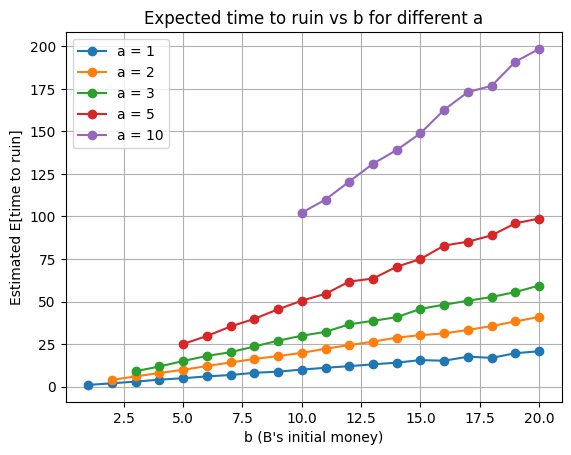

In [ ]:
num_rep = 5000  # or 10000 if it runs fast enough
a_values = [1, 2, 3, 5, 10]   # selected a's
b_max = 20                    # or larger if you have time

plt.figure()

for a in a_values:
    b_values = list(range(a, b_max + 1))  # ensure a <= b
    mean_times = []

    for b in b_values:
        mean, lo, hi = estimate_time_to_ruin(a, b, num_rep=num_rep, seed=a*100 + b)
        mean_times.append(mean)

    plt.plot(b_values, mean_times, marker='o', label=f'a = {a}')

plt.xlabel("b (B's initial money)")
plt.ylabel("Estimated E[time to ruin]")
plt.title("Expected time to ruin vs b for different a")
plt.grid(True)
plt.legend()
plt.show()

<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)


Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by $n_R$ associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by $d_C$ doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by $d_E$ doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are $n_I$ IW beds available. After a stay at the IW, 20\% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.


![](hwq2figure.png)

**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

<hr>

## Ans.

$$
\textbf{Arrival Rates in Steady State}
$$

$$
\lambda_R = \text{arrival rate into reception} \\
\lambda_C = \lambda_R \\
\lambda_E = 5 \\
\lambda_I = 0.1\,\lambda_C + 0.5\,\lambda_E
$$

$$
\lambda_R = 20 + 0.25\,\lambda_C + 0.8\,\lambda_I
= 20 + 0.25\,\lambda_R + 0.8(0.1\lambda_R + 2.5)
$$

$$
0.67\lambda_R = 22 \quad\Rightarrow\quad \lambda_R = \frac{2200}{67} \approx 32.84
$$

$$
\lambda_C = \lambda_R \approx 32.84
$$

$$
\lambda_I = 0.1\lambda_R + 2.5 = 0.1(32.84) + 2.5 \approx 5.78
$$

$$
\lambda_E = 5
$$

$$
\textbf{Service Rates}
$$

$$
\mu_R = 12 \quad (\text{5 min per patient}) \\
\mu_C = 4 \quad (\text{15 min per patient}) \\
\mu_E = 1 \quad (\text{1 hour per ER patient}) \\
\mu_I = \frac{1}{72} \quad (\text{72 hour IW stay})
$$

$$
\textbf{Stability Condition:} \quad \lambda < c\,\mu
$$

$$
\text{Reception: } \\
32.84 < 12\,n_R \quad\Rightarrow\quad n_R > \frac{32.84}{12} \approx 2.74 \\
\boxed{n_R \ge 3}
$$

$$
\text{Clinic: } \\
32.84 < 4\,d_C \quad\Rightarrow\quad d_C > \frac{32.84}{4} \approx 8.21 \\
\boxed{d_C \ge 9}
$$

$$
\text{ER: } \\
5 < d_E \quad\Rightarrow\quad d_E > 5 \\
\boxed{d_E \ge 6}
$$

$$
\text{Internal Ward (IW): } \\
5.78 < \frac{n_I}{72} \quad\Rightarrow\quad n_I > 5.78 \times 72 \approx 416.4 \\
\boxed{n_I \ge 417}
$$

$$
\boxed{
\text{Minimum staffing to remain stable: } \;
n_R \ge 3,\;
d_C \ge 9,\;
d_E \ge 6,\;
n_I \ge 417
}
$$

<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.

$$
\textbf{Clinic Arrival and Service Rates}
$$

$$
\lambda_C = \lambda_R = \frac{2200}{67} \approx 32.84 \text{ patients/hour}
$$

$$
\mu_C = \frac{1}{0.25} = 4 \text{ patients/hour per doctor}
$$

$$
c = d_C = 10, \qquad
\rho = \frac{\lambda_C}{c \mu_C}
      = \frac{32.84}{40}
      \approx 0.821
$$

$$
a = \frac{\lambda_C}{\mu_C} = \frac{32.84}{4} \approx 8.21
$$

$$
\textbf{M/M/10 Queue:}
$$

$$
P_0 =
\left[
\sum_{k=0}^{9} \frac{a^k}{k!}
+
\frac{a^{10}}{10!(1-\rho)}
\right]^{-1}
$$

$$
L_q =
\frac{a^{10}\rho}{10!(1-\rho)^2} \; P_0
\approx 2.10
$$

$$
L_s = \frac{\lambda_C}{\mu_C} = a \approx 8.21
$$

$$
L = L_q + L_s \approx 2.10 + 8.21 = 10.31
$$

$$
W = \frac{L}{\lambda_C}
   = \frac{10.31}{32.84}
   \approx 0.314 \text{ hours}
   \approx 18.8 \text{ minutes}
$$

$$
\text{Average number of busy clinic doctors} = L_s = 8.21
$$

$$
\boxed{
W \approx 0.314\ \text{hours (}\approx 19\text{ min)},\quad
\text{Busy doctors} \approx 8.21
}
$$

<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic.

<hr>

## Ans.

$$
\textbf{Arrival and Service Parameters}
$$

$$
\lambda_C = \lambda_R = \frac{2200}{67} \approx 32.84 \ \text{patients/hour}
$$

$$
d_C = 10, \qquad \mu_C = 4 \ \text{patients/hour/doctor}
$$

$$
a_C = \frac{\lambda_C}{\mu_C} \approx 8.209, \qquad
\rho_C = \frac{a_C}{d_C} \approx 0.821
$$

$$
\lambda_E = 5 \ \text{patients/hour}, \qquad
d_E = 7, \qquad
\mu_E = 1
$$

$$
a_E = \frac{\lambda_E}{\mu_E} = 5, \qquad
\rho_E = \frac{5}{7} \approx 0.714
$$

$$
\textbf{Probability a M/M/c queue is empty:}
$$

$$
P_0
=
\left[
\sum_{k=0}^{c-1} \frac{a^k}{k!}
+
\frac{a^c}{c!(1-\rho)}
\right]^{-1}
$$

$$
P_C(0)
=
\left[
\sum_{k=0}^{9} \frac{a_C^k}{k!}
+
\frac{a_C^{10}}{10!(1-\rho_C)}
\right]^{-1}
\approx 2.14 \times 10^{-4}
$$

$$
P_E(0)
=
\left[
\sum_{k=0}^{6} \frac{a_E^k}{k!}
+
\frac{a_E^{7}}{7!(1-\rho_E)}
\right]^{-1}
\approx 5.97 \times 10^{-3}
$$

$$
\textbf{Joint probability (Jackson network independence):}
$$

$$
P(\text{clinic empty AND ER empty})
=
P_C(0)\,P_E(0)
\approx
(2.14\times 10^{-4})(5.97\times 10^{-3})
$$

$$
\boxed{
P(\text{both empty}) \approx 1.3 \times 10^{-6}
}
$$

<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.

Use your simulator to study the following:

$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.

$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

In [1]:
import numpy as np
import heapq

# ==========================
# parameters that don't change
# ==========================
LAMBDA_NEW = 20.0   # new non-emergency arrivals / hr (to Reception)
LAMBDA_ER  = 5.0    # emergency arrivals / hr (to ER)

MEAN_RECEPTION = 5.0 / 60.0      # hr
MEAN_CLINIC    = 15.0 / 60.0     # hr
MEAN_ER        = 1.0             # hr
MEAN_IW        = 72.0            # hr
MEAN_FOLLOWUP  = 504.0           # hr (3 weeks)

# routing probabilities
P_CLINIC_FOLLOWUP = 0.25
P_CLINIC_IW       = 0.10   # 10% to IW
# 65% discharged from clinic

P_ER_IW = 0.5              # 50% to IW from ER
# 50% discharged from ER

P_IW_FOLLOWUP = 0.8        # 80% to follow-up, 20% discharged


# ==========================
# event-driven simulation
# ==========================

def exp_time(mean, rng):
    return rng.exponential(mean)

def simulate_hospital(
    T_max,
    nR, dC, dE, nI,
    seed=0,
    record_interval=10.0,   # how often to record total waiting (hours)
):
    """
    Simulate the hospital up to time T_max (hours).
    Returns:
        times, total_waits   : for plotting total waiting vs time
        clinic_wait_times    : list of total time spent in clinic per visit (wait+service)
        clinic_busy_time     : total doctor-busy time in clinic (sum over all docs)
        T_end                : final time
    """
    rng = np.random.default_rng(seed)

    # State: queues and servers
    # Reception, Clinic, ER, IW
    q_R = q_C = q_E = q_I = 0
    busy_R = busy_C = busy_E = busy_I = 0

    t = 0.0

    # event list: (time, counter, event_type, node)
    # event_type: 'arr_R', 'arr_ER', 'dep_R', 'dep_C', 'dep_E', 'dep_I', 'followup_R'
    event_list = []
    counter = 0

    def schedule(time, etype, node=None, extra=None):
        nonlocal counter
        heapq.heappush(event_list, (time, counter, etype, node, extra))
        counter += 1

    # schedule first external arrivals
    schedule(t + exp_time(1.0 / LAMBDA_NEW, rng), 'arr_R', None)
    schedule(t + exp_time(1.0 / LAMBDA_ER,  rng), 'arr_ER', None)

    # stats for part (i)
    times = [0.0]
    total_waits = [0]  # total waiting (not in service or IW bed)

    next_record_time = record_interval

    # stats for part (ii) - clinic performance
    clinic_arrival_times = []   # when each clinic patient enters queue
    clinic_sojourn_times = []   # wait + service for completed clinic visits
    clinic_busy_time = 0.0
    last_time_busy_change = 0.0

    def total_wait():
        # waiting in Reception, Clinic, ER, IW queues (not being served)
        return q_R + q_C + q_E + q_I

    while event_list and t < T_max:
        time, _, etype, node, extra = heapq.heappop(event_list)
        if time > T_max:
            break

        # accumulate clinic busy-time (for average busy doctors)
        # number of busy clinic doctors * delta_t
        clinic_busy_time += busy_C * (time - t)
        t = time

        # record total waiting every record_interval hours
        while next_record_time <= t and next_record_time <= T_max:
            times.append(next_record_time)
            total_waits.append(total_wait())
            next_record_time += record_interval

        # ---- handle events ----
        if etype == 'arr_R':  # external arrival to reception
            # schedule next external arrival
            schedule(t + exp_time(1.0 / LAMBDA_NEW, rng), 'arr_R', None)

            # join reception queue / service
            if busy_R < nR:
                busy_R += 1
                # service completion
                schedule(t + exp_time(MEAN_RECEPTION, rng), 'dep_R', None)
            else:
                q_R += 1

        elif etype == 'followup_R':  # follow-up arrival to reception
            if busy_R < nR:
                busy_R += 1
                schedule(t + exp_time(MEAN_RECEPTION, rng), 'dep_R', None)
            else:
                q_R += 1

        elif etype == 'dep_R':  # completion at reception -> to clinic
            # free a receptionist / start next if queue nonempty
            if q_R > 0:
                q_R -= 1
                schedule(t + exp_time(MEAN_RECEPTION, rng), 'dep_R', None)
            else:
                busy_R -= 1

            # arrival to clinic
            # mark arrival time for clinic sojourn
            clinic_arrival_times.append(t)
            if busy_C < dC:
                busy_C += 1
                # service time at clinic
                schedule(t + exp_time(MEAN_CLINIC, rng), 'dep_C', None)
            else:
                q_C += 1

        elif etype == 'arr_ER':  # external arrival to ER
            schedule(t + exp_time(1.0 / LAMBDA_ER, rng), 'arr_ER', None)
            if busy_E < dE:
                busy_E += 1
                schedule(t + exp_time(MEAN_ER, rng), 'dep_E', None)
            else:
                q_E += 1

        elif etype == 'dep_C':  # completion at clinic
            # sojourn time = t - arrival_time
            arrival_time = clinic_arrival_times.pop(0)  # FIFO
            clinic_sojourn_times.append(t - arrival_time)

            # free or start next clinic service
            if q_C > 0:
                q_C -= 1
                busy_C += 0  # still same number busy
                schedule(t + exp_time(MEAN_CLINIC, rng), 'dep_C', None)
            else:
                busy_C -= 1

            # routing from clinic
            u = rng.random()
            if u < P_CLINIC_FOLLOWUP:
                # follow-up, schedule delayed arrival to reception
                schedule(t + exp_time(MEAN_FOLLOWUP, rng), 'followup_R', None)
            elif u < P_CLINIC_FOLLOWUP + P_CLINIC_IW:
                # to IW
                if busy_I < nI:
                    busy_I += 1
                    schedule(t + exp_time(MEAN_IW, rng), 'dep_I', None)
                else:
                    q_I += 1
            else:
                # discharged; nothing more
                pass

        elif etype == 'dep_E':  # completion at ER
            if q_E > 0:
                q_E -= 1
                schedule(t + exp_time(MEAN_ER, rng), 'dep_E', None)
            else:
                busy_E -= 1

            # routing from ER
            if rng.random() < P_ER_IW:
                # to IW
                if busy_I < nI:
                    busy_I += 1
                    schedule(t + exp_time(MEAN_IW, rng), 'dep_I', None)
                else:
                    q_I += 1
            else:
                # discharged
                pass

        elif etype == 'dep_I':  # completion in IW
            if q_I > 0:
                q_I -= 1
                schedule(t + exp_time(MEAN_IW, rng), 'dep_I', None)
            else:
                busy_I -= 1

            # routing from IW
            if rng.random() < P_IW_FOLLOWUP:
                # follow-up non-emergency
                schedule(t + exp_time(MEAN_FOLLOWUP, rng), 'followup_R', None)
            else:
                # discharged
                pass

    # final busy period until T_max for clinic busy time
    if t < T_max:
        clinic_busy_time += busy_C * (T_max - t)
        t = T_max

    # any remaining recording times
    while next_record_time <= T_max:
        times.append(next_record_time)
        total_waits.append(total_wait())
        next_record_time += record_interval

    return (
        np.array(times),
        np.array(total_waits),
        np.array(clinic_sojourn_times),
        clinic_busy_time,
        t
    )

###i)

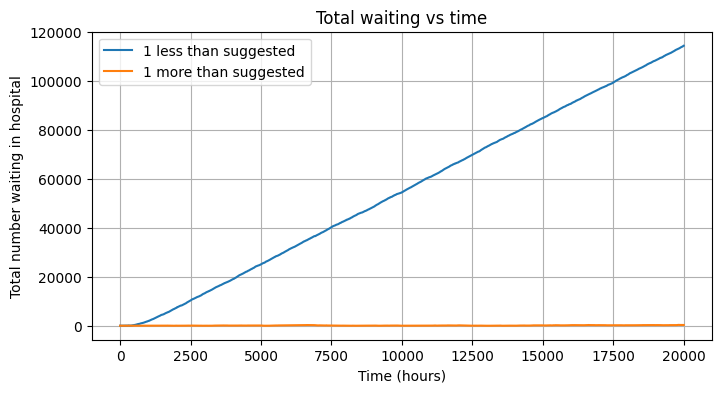

In [2]:
import matplotlib.pyplot as plt

T_max = 20000  # hours, long horizon

# 1 less than suggested
times1, waits1, _, _, _ = simulate_hospital(T_max, nR=2, dC=8, dE=5, nI=416, seed=1)

# 1 more than suggested
times2, waits2, _, _, _ = simulate_hospital(T_max, nR=4, dC=10, dE=7, nI=418, seed=2)

plt.figure(figsize=(8,4))
plt.plot(times1, waits1, label="1 less than suggested")
plt.plot(times2, waits2, label="1 more than suggested")
plt.xlabel("Time (hours)")
plt.ylabel("Total number waiting in hospital")
plt.title("Total waiting vs time")
plt.legend()
plt.grid(True)
plt.show()

### ii)

In [3]:
T_max = 20000

times, waits, clinic_sojourn, clinic_busy_time, T_end = simulate_hospital(
    T_max, nR=3, dC=10, dE=7, nI=500, seed=3
)

avg_W_clinic = clinic_sojourn.mean()        # hours
avg_busy_docs = clinic_busy_time / T_end    # average number of busy doctors

print("Estimated average time in clinic (hours):", avg_W_clinic)
print("Estimated average time in clinic (minutes):", avg_W_clinic * 60)
print("Estimated average number of busy clinic doctors:", avg_busy_docs)

Estimated average time in clinic (hours): 0.3112323758339278
Estimated average time in clinic (minutes): 18.67394255003567
Estimated average number of busy clinic doctors: 8.080440072696039


The values for ii) are approximatly equal to what I got in part b). Where the estimated time in clinic is ~18.8 and average number of doctors are ~8.2.